In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# importing dataset
data = pd.read_csv('/content/train_2.csv')

# Dataset info summary
data.info()

# Preview
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [2]:
# Convert 'date' to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Filter data for a specific store and item (e.g., store 1 and item 1)
store_id = 1
item_id = 1


In [3]:
filtered_data = data[(data['store'] == store_id) & (data['item'] == item_id)]

# Sort the data by date
filtered_data = filtered_data[['sales']].sort_index()

# Preview the filtered time series
filtered_data.info(), filtered_data.head(), filtered_data.tail()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   1826 non-null   int64
dtypes: int64(1)
memory usage: 28.5 KB


(None,
             sales
 date             
 2013-01-01     13
 2013-01-02     11
 2013-01-03     14
 2013-01-04     13
 2013-01-05     10,
             sales
 date             
 2017-12-27     14
 2017-12-28     19
 2017-12-29     15
 2017-12-30     27
 2017-12-31     23)

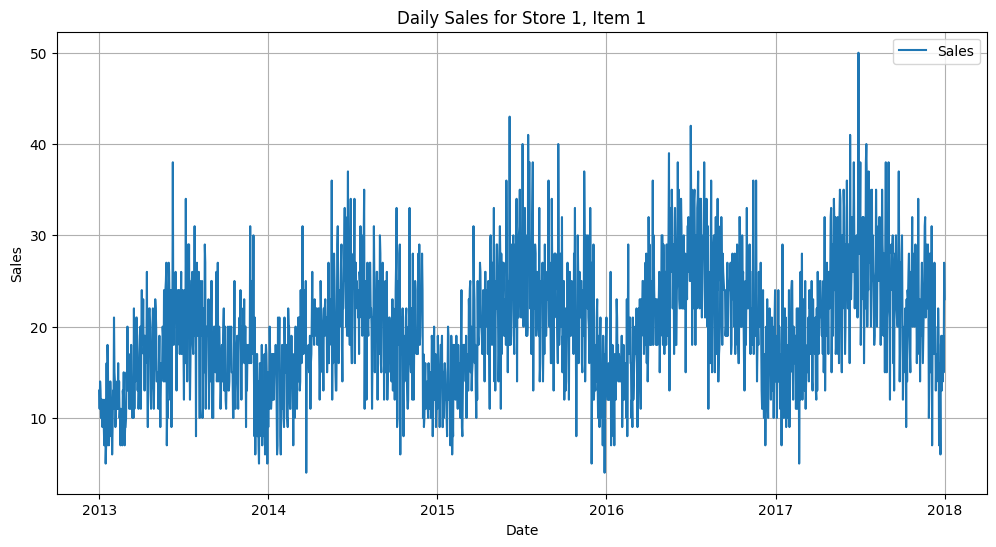

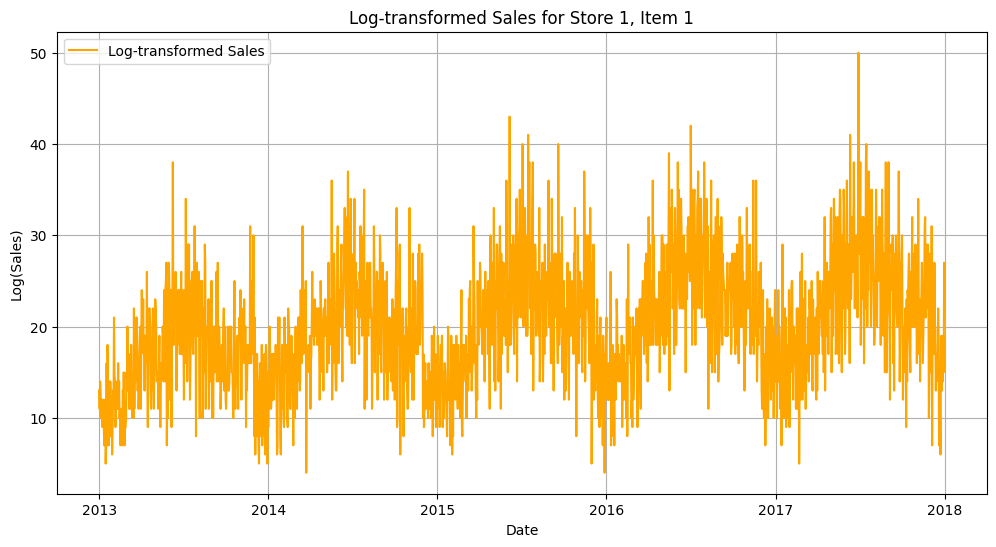

((1460, 2), (366, 2))

In [4]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['sales'], label='Sales')
plt.title('Daily Sales for Store 1, Item 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

# Apply log transformation to stabilize variance (only if all values > 0)
if (filtered_data['sales'] > 0).all():
    filtered_data['log_sales'] = np.log(filtered_data['sales'])
    filtered_data['log_sales'] = filtered_data['sales']  # Skip log transformation if non-positive values

# Visualize log-transformed data (if applied)
if 'log_sales' in filtered_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data.index, filtered_data['log_sales'], label='Log-transformed Sales', color='orange')
    plt.title('Log-transformed Sales for Store 1, Item 1')
    plt.xlabel('Date')
    plt.ylabel('Log(Sales)')
    plt.legend()
    plt.grid()
    plt.show()

# Split the data into training and testing (80% train, 20% test)
split_index = int(len(filtered_data) * 0.8)
train_data = filtered_data.iloc[:split_index]
test_data = filtered_data.iloc[split_index:]

train_data.shape, test_data.shape


ADF Statistic: -2.8197192807983997
p-value: 0.05551174940647549


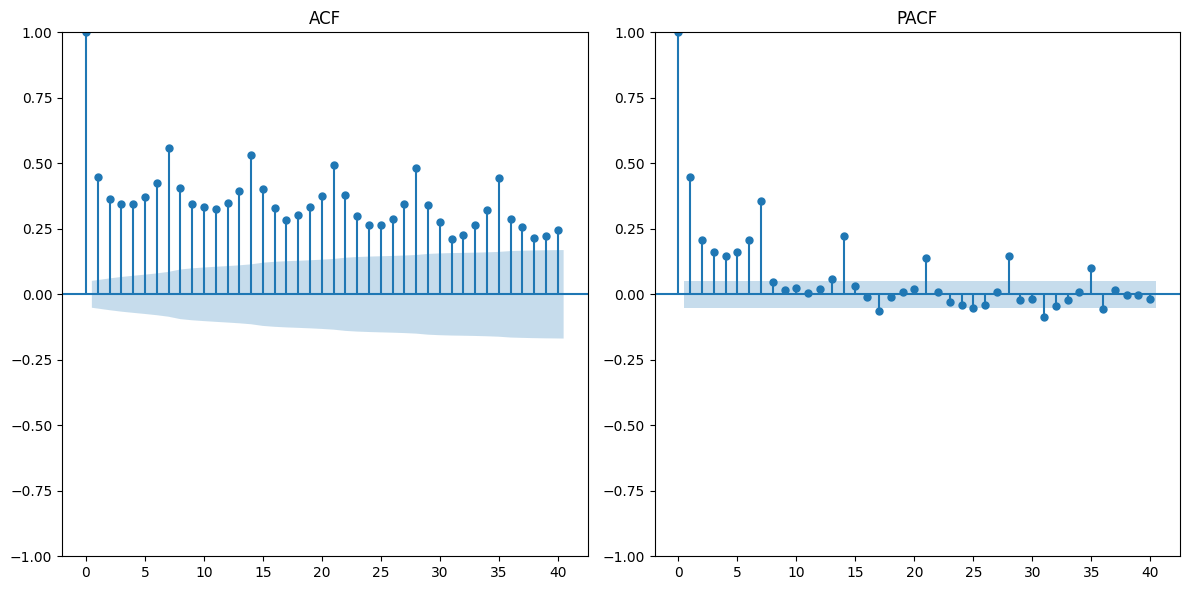

In [5]:
# Choose the column to use for analysis ('log_sales' if log-transformed, otherwise 'sales')
analysis_column = 'log_sales' if 'log_sales' in filtered_data.columns else 'sales'

# Perform ADF test to check stationarity
adf_result = adfuller(train_data[analysis_column])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(train_data[analysis_column], ax=plt.gca(), lags=40, title="ACF")
plt.subplot(122)
plot_pacf(train_data[analysis_column], ax=plt.gca(), lags=40, title="PACF")
plt.tight_layout()
plt.show()
